Summary of Steps:
Import necessary libraries.
Preprocess the data: Standardized the features to ensure equal contribution.
Determine the optimal number of clusters using the Elbow method: The Elbow graph indicated 3 as the optimal number.
Apply KMeans clustering: Clustered the data into 3 clusters.
Visualize the clusters: Created a scatter plot to visually represent the clusters.

Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Load the Data

In [3]:
import pandas as pd

# Load the dataset
# file_path = '/mnt/data/Iris.csv'
iris_df = pd.read_csv('C:\\Users\\anonymous\\Desktop\\TSF GRIP Task\\Iris.csv')

# Display the first few rows of the dataset to understand its structure
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Preprocess the data

In [4]:
# Extracting the features for clustering
features = iris_df.drop(['Id', 'Species'], axis=1)

# Standardizing the features
# initializes a StandardScaler object from scikit-learn
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

'''
fit_transform() method does two things:
Fit: Calculates the mean and standard deviation for each feature in the dataset.
Transform: Scales the features by subtracting the mean and dividing by the standard deviation for each feature.
'''


Determine the optimal number of clusters using the Elbow method

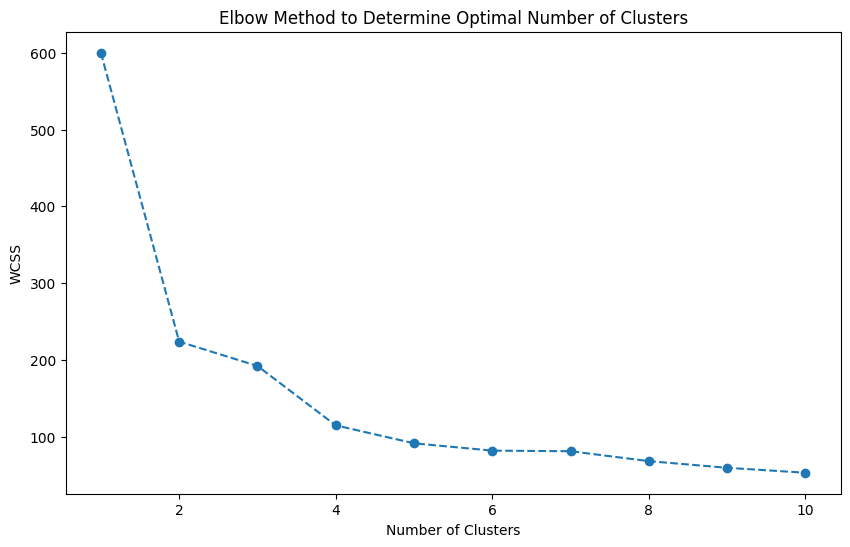

In [5]:
# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Apply KMeans clustering

In [7]:
# From the Elbow method graph, we select the optimal number of clusters
optimal_clusters = 3

# Applying KMeans clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
iris_df['Cluster'] = kmeans.fit_predict(scaled_features)

iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


Visualize the clusters

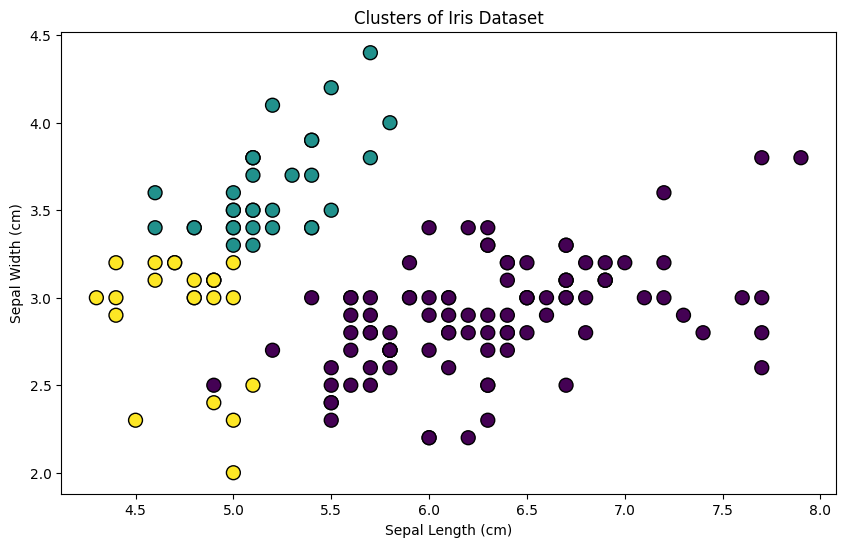

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'], c=iris_df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()